<h1> Meetup notebook </h1>

<h3> Imports </h3>

In [61]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook
from ipywidgets import interact
from scipy.stats import spearmanr
from rpy2 import robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()
output_notebook()

Loading BokehJS ...

<h3> Step 1: Open data </h3>

In [13]:
data = pandas.read_csv('Deaths_in_122_U.S._cities_-_1962-2016._122_Cities_Mortality_Reporting_System.csv')
print data.shape
print data.columns

(346342, 13)
Index([u'Year', u'WEEK', u'Week Ending Date', u'REGION', u'State', u'City',
       u'Pneumonia and Influenza Deaths', u'All Deaths',
       u'<1 year (all cause deaths)', u'1-24 years (all cause deaths)',
       u'25-44 years', u'45-64 years (all cause deaths)',
       u'65+ years (all cause deaths)'],
      dtype='object')


<h3>Step 2: Visualize data</h3>

In [19]:
pandas.isnull(data['<1 year (all cause deaths)']).sum() > 0

True

<h4> Oh no! Nulls.... </h4>

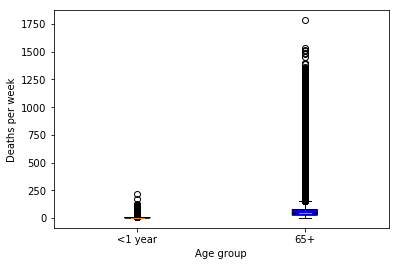

In [23]:
fig, ax = plt.subplots()
bplot = ax.boxplot([data['<1 year (all cause deaths)'].fillna(0), data['65+ years (all cause deaths)'].fillna(0)], notch=True, vert=True, patch_artist=True)
colors = ['red', 'blue']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
ax.set_ylabel('Deaths per week')
ax.set_xlabel('Age group')
plt.setp(ax, xticks=[1, 2], xticklabels=['<1 year', '65+'])
plt.show()

<h4> Hmmmm... That's ugly. </h4>

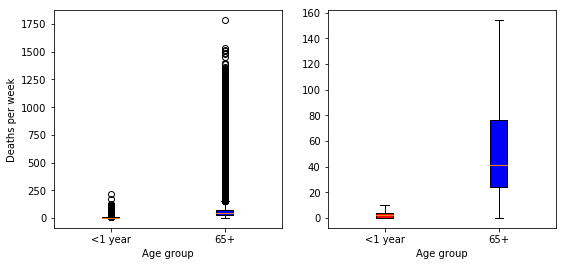

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
bplots = []
for i in range(2):
    if i == 0:
        showfliers = True
    else:
        showfliers = False
    bplots.append(ax[i].boxplot([data['<1 year (all cause deaths)'].fillna(0), data['65+ years (all cause deaths)'].fillna(0)], vert=True, patch_artist=True, showfliers=showfliers))
colors = ['red', 'blue']
for bplot in bplots:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
ax[0].set_ylabel('Deaths per week')
ax[0].set_xlabel('Age group')
ax[1].set_xlabel('Age group')
plt.setp(ax, xticks=[1, 2], xticklabels=['<1 year', '65+'])
plt.show()

<h4>Now just in Boston... And let's make a function...</h4>

In [38]:
def make_boxplot(plot_data):
    fig, ax = plt.subplots()
    bplot = ax.boxplot([plot_data['<1 year (all cause deaths)'].fillna(0), plot_data['65+ years (all cause deaths)'].fillna(0)], notch=True, vert=True, patch_artist=True, showfliers=False)
    colors = ['red', 'blue']
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    ax.set_ylabel('Deaths per week')
    ax.set_xlabel('Age group')
    plt.setp(ax, xticks=[1, 2], xticklabels=['<1 year', '65+'])
    plt.show()

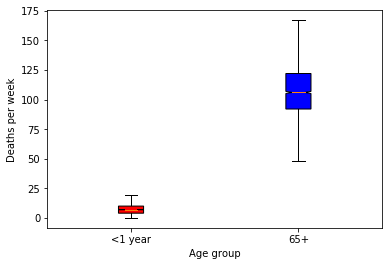

In [39]:
boston_data = data[data['City'] == 'Boston']
make_boxplot(boston_data)

<h3>Step 3: Interactive visualization</h3>

In [49]:
p = figure()
p.circle(boston_data['Pneumonia and Influenza Deaths'], boston_data['All Deaths'], radius=0.5, line_color="black")
show(p)

<h4> Now make it more interactive... </h4>

In [53]:
p = figure()
cs = p.circle(boston_data['Pneumonia and Influenza Deaths'], boston_data['All Deaths'], radius=0.5, line_color="black")

def update(yData):
    cs.data_source.data['y'] = boston_data[yData]
    push_notebook()

show(p, notebook_handle=True)
interact(update, yData=[
    u'All Deaths',
    u'<1 year (all cause deaths)', u'1-24 years (all cause deaths)',
    u'25-44 years', u'45-64 years (all cause deaths)',
    u'65+ years (all cause deaths)'
])

<function __main__.update>

<h3>Step 4: Modeling and statistics!</h3>

In [56]:
print spearmanr(boston_data['Pneumonia and Influenza Deaths'].fillna(0), boston_data['45-64 years (all cause deaths)'].fillna(0))

SpearmanrResult(correlation=-0.003215513046006202, pvalue=0.8636205204481423)


In [57]:
print spearmanr(boston_data['Pneumonia and Influenza Deaths'].fillna(0), boston_data['65+ years (all cause deaths)'].fillna(0))

SpearmanrResult(correlation=0.22871964684948373, pvalue=3.2599868260188645e-35)


In [73]:
M = robjects.r['cor.test'](boston_data['Pneumonia and Influenza Deaths'], boston_data['65+ years (all cause deaths)'], method="spearman", continuity=True)

In [70]:
list(M.names)

['statistic',
 'parameter',
 'p.value',
 'estimate',
 'null.value',
 'alternative',
 'method',
 'data.name']

In [72]:
M[2]

R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000000000F207448 / R:0x00000000191EC300>
[0.000000]

In [86]:
M = robjects.r['cor'](boston_data['Pneumonia and Influenza Deaths'], boston_data['65+ years (all cause deaths)'], method="spearman", use = "complete.obs")

In [87]:
M

R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000000000F2092C8 / R:0x0000000014568228>
[0.217280]